In [1]:
with open("glitched_image.jpg", "rb") as f:
    data = f.read()
print(len(data))


46611


In [3]:
with open("glitched_image.jpg", "rb") as f:
    data = f.read()

print("Header bytes:", data[:10])
print("Ending bytes:", data[-10:])


Header bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF'
Ending bytes: b'\x00\xfbc\xff\xfe\x00\x03\x00\xff\xd9'


In [4]:
from PIL import Image

try:
    img = Image.open("glitched_image.jpg")
    img.save("fixed_image.jpg", "JPEG")
    print("Re-encoded successfully!")
except Exception as e:
    print("Error:", e)


Re-encoded successfully!


In [5]:
import cv2

img = cv2.imread("glitched_image.jpg")
cv2.imwrite("fixed_image.jpg", img)


True

In [6]:
from PIL import Image
import numpy as np

img = Image.open("glitched_image.jpg")
arr = np.array(img)
print("Shape:", arr.shape)


Shape: (624, 1080, 3)


In [7]:
from PIL import Image
import numpy as np

img = Image.open("glitched_image.jpg")
arr = np.array(img)

# Compute the average color across the image
mean_color = arr.mean(axis=(0, 1))

# Detect abnormal (glitched) horizontal lines by brightness jumps
row_diff = np.abs(np.diff(arr.mean(axis=(1, 2))))
threshold = np.mean(row_diff) + 3*np.std(row_diff)
glitch_rows = np.where(row_diff > threshold)[0]

# Replace glitched rows with average color (simple visual repair)
for r in glitch_rows:
    arr[r] = mean_color

Image.fromarray(arr.astype('uint8')).save("fixed_image.jpg")
print("Glitch rows fixed:", len(glitch_rows))


Glitch rows fixed: 12


In [9]:
from PIL import Image
import numpy as np

img = Image.open("glitched_image.jpg")
arr = np.array(img)
print(arr)

[[[ 54  35  55]
  [136 115 132]
  [165 144 153]
  ...
  [100 177 229]
  [100 177 229]
  [100 177 229]]

 [[ 35  17  33]
  [ 70  50  62]
  [148 125 131]
  ...
  [100 177 229]
  [100 177 229]
  [100 177 229]]

 [[100  80  89]
  [ 40  21  25]
  [107  86  83]
  ...
  [100 178 227]
  [100 178 227]
  [100 178 227]]

 ...

 [[179   0 224]
  [179   0 224]
  [179   0 224]
  ...
  [179   0 224]
  [179   0 224]
  [179   0 224]]

 [[179   0 224]
  [179   0 224]
  [179   0 224]
  ...
  [179   0 224]
  [179   0 224]
  [179   0 224]]

 [[179   0 224]
  [179   0 224]
  [179   0 224]
  ...
  [179   0 224]
  [179   0 224]
  [179   0 224]]]


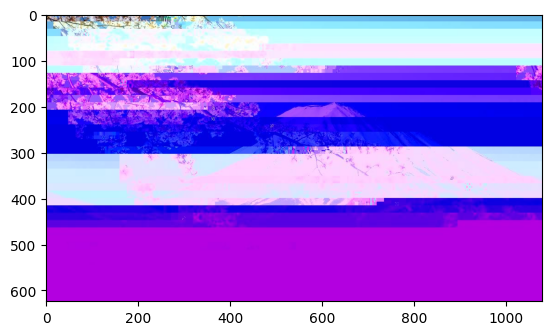

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(arr[:])  
plt.show()


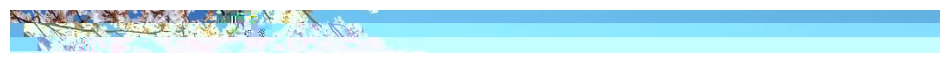

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))  # make figure bigger
plt.imshow(arr[0:50, :, :])  # select first 50 rows, all columns
plt.axis('off')  # hide axes
plt.show()


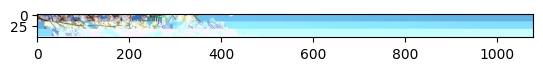

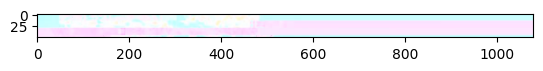

In [13]:
# Display first 50 rows
plt.imshow(arr[:50, :, :])
plt.show()

# Display next 50 rows
plt.imshow(arr[50:100, :, :])
plt.show()


In [15]:
import numpy as np
from PIL import Image

img = Image.open("glitched_image.jpg")
arr = np.array(img)

block_size = 17  # ~16.666 rounded
height = arr.shape[0]
